In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Afficher mon dataset en entier
pd.set_option("max_columns", None)
pd.set_option("max_row", 20)

# Analyse Exploratoire

In [4]:
# Chargement du dataset
df = pd.read_excel ('Dataset-coeur.xlsx')

In [5]:
# visualisation du dataset
df

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,homme,AT,110,264,0,Normal,132,Non,1.2,Plat,1
914,68,homme,ASY,144,193,1,Normal,141,Non,3.4,Plat,1
915,57,homme,ASY,130,131,0,Normal,115,Oui,1.2,Plat,1
916,57,femme,AA,130,236,0,LVH,174,Non,0.0,Plat,1


* Vu qu'il peut arriver que j'ai besoin du dataset d'origine, je décide alors de le duppliquer afin de travailler sur la copie.

In [6]:
df1=df.copy()
df1

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,homme,AT,110,264,0,Normal,132,Non,1.2,Plat,1
914,68,homme,ASY,144,193,1,Normal,141,Non,3.4,Plat,1
915,57,homme,ASY,130,131,0,Normal,115,Oui,1.2,Plat,1
916,57,femme,AA,130,236,0,LVH,174,Non,0.0,Plat,1


Mon dataset présente 918 lignes et 12 colonnes. De mon point de vue, le nombre de lignes par rapport au nombre de colone est assez conséquent pour effectuer une bonne analyse. Cela ne pose pas de problème.

In [7]:
# Voir s'il y a des données qui ont été dupliqués

df1.duplicated().sum()

0

Je constate que je n'ai pas de données duppliquées dans mon dataset

In [8]:
# verification de données manquantes en %

(df1.isna().sum()/df1.shape[0]).sort_values()*100

AGE            0.0
SEXE           0.0
TDT            0.0
PAR            0.0
CHOLESTEROL    0.0
GAJ            0.0
ECG            0.0
FCMAX          0.0
ANGINE         0.0
DEPRESSION     0.0
PENTE          0.0
CŒUR           0.0
dtype: float64

Au regard de ce qui précède, je constate que mon jeu de données ne contient pas de données manquantes

#### RENOMINATION DE CERTAINES COLONES

* Pour une meilleure exploitation de mon jeu de données, je décide de renommer certaines colonnes pour bien les comprendre

In [9]:

df1.rename(columns={'TDT': 'Typ_douleur_thor', 
                  'PAR' : 'Pression_art_orepos',
                   'GAJ' : 'Glycémie_à_jeun',
                   'ECG' : 'Result_électrocard',
                    'FCMAX':'Fréqce_card_max',
                    'DEPRESSION ' : 'DEPRESSION'}, inplace=True)
df1.head()

,AGE,SEXE,Typ_douleur_thor,Pression_art_orepos,CHOLESTEROL,Glycémie_à_jeun,Result_électrocard,Fréqce_card_max,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


### EXAMEN DE LA VARIABLE CIBLE

In [10]:
df1['CŒUR'].value_counts()

1    508
0    410
Name: CŒUR, dtype: int64

<AxesSubplot:ylabel='CŒUR'>

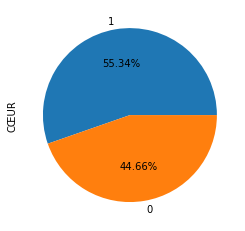

In [11]:
df1['CŒUR'].value_counts().plot.pie(autopct = '%1.2f%%')

* 55.34% de personnes sont atteintes de maladies cardiaques contre 44.66% en bonne santé.

### EXAMEN DES VARIABLES QUALITATIVES INDIVIDUELLEMENT

In [12]:
# verification des donnees qualit
var_quali = df1.select_dtypes(include="object").columns
var_quali

Index(['SEXE', 'Typ_douleur_thor', 'Result_électrocard', 'ANGINE', 'PENTE'], dtype='object')

* En visualisant le dataset, je note la présence de variables quantitatives discrète (binaires : 0, 1). Je décide donc de les ajouter à mes variables qualitatives pour une meilleure exploitation dde mon jeu de données

In [13]:
var_quali=df1[['SEXE', 'Typ_douleur_thor', 'Result_électrocard', 'ANGINE', 'PENTE', 'Glycémie_à_jeun']]
var_quali

,SEXE,Typ_douleur_thor,Result_électrocard,ANGINE,PENTE,Glycémie_à_jeun
0,homme,AA,Normal,Non,Ascendant,0
1,femme,DNA,Normal,Non,Plat,0
2,homme,AA,ST,Non,Ascendant,0
3,femme,ASY,Normal,Oui,Plat,0
4,homme,DNA,Normal,Non,Ascendant,0
...,...,...,...,...,...,...
913,homme,AT,Normal,Non,Plat,0
914,homme,ASY,Normal,Non,Plat,1
915,homme,ASY,Normal,Oui,Plat,0
916,femme,AA,LVH,Non,Plat,0


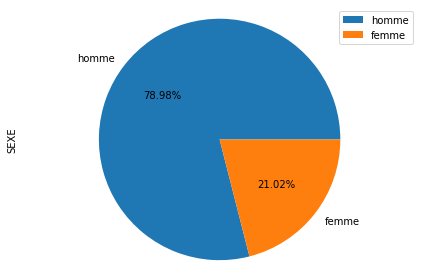

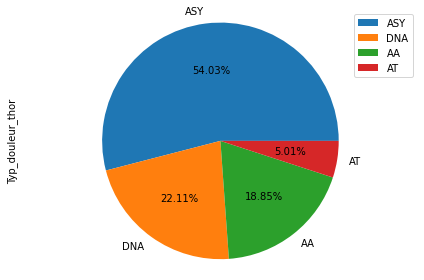

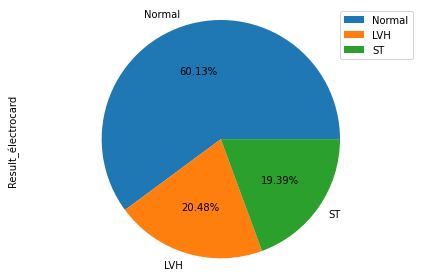

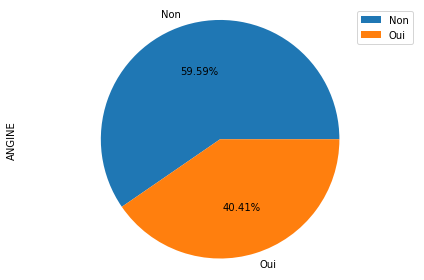

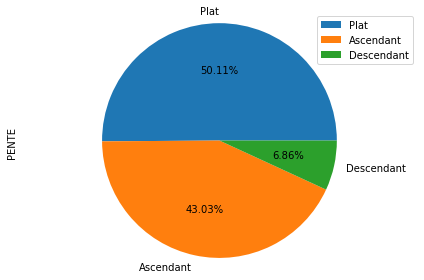

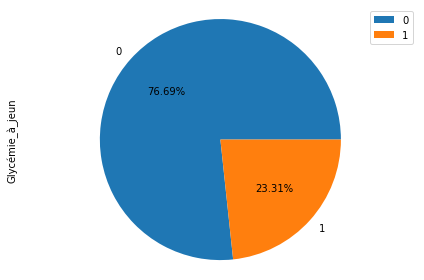

In [14]:
# Viusalisation des variables qualit

for col in var_quali:
    plt.figure()
    df1[col].value_counts().plot.pie(autopct='%1.2f%%')
    plt.axis('equal') 
    plt.legend()
    #plt.title('Distribution de ' + col)
    plt.tight_layout()

### EXAMEN DES VARIABLES QUANTITATIVES INDIVIDUELLEMENT

In [15]:
var_quant = df1[['AGE', 'Pression_art_orepos', 'CHOLESTEROL',
       'Fréqce_card_max', 'DEPRESSION']]
var_quant

,AGE,Pression_art_orepos,CHOLESTEROL,Fréqce_card_max,DEPRESSION
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0
...,...,...,...,...,...
913,45,110,264,132,1.2
914,68,144,193,141,3.4
915,57,130,131,115,1.2
916,57,130,236,174,0.0


In [16]:
from scipy.stats import norm

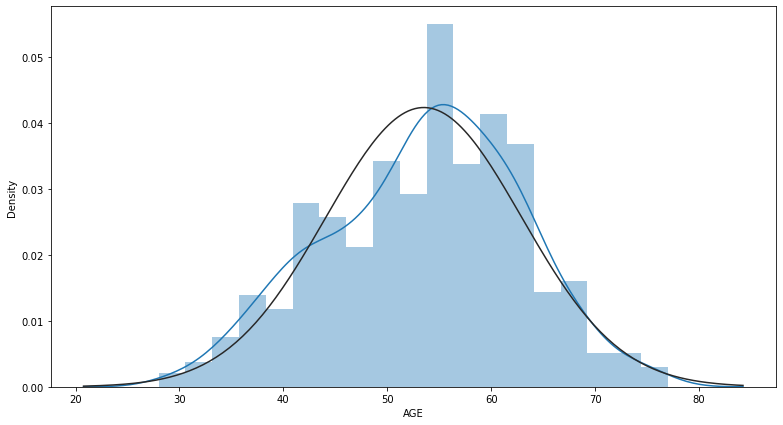

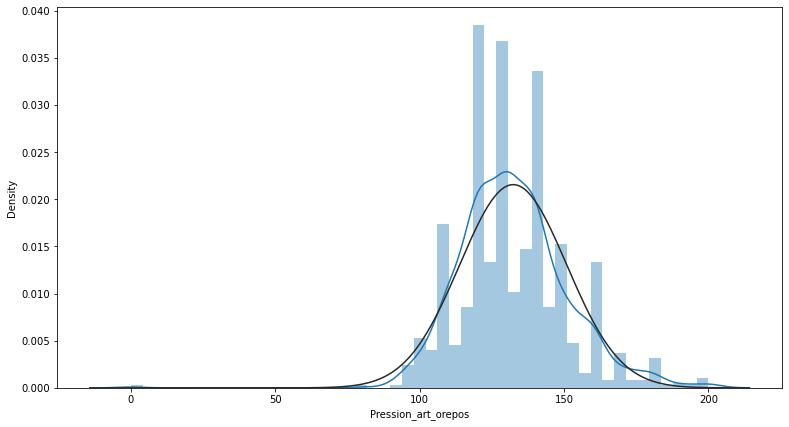

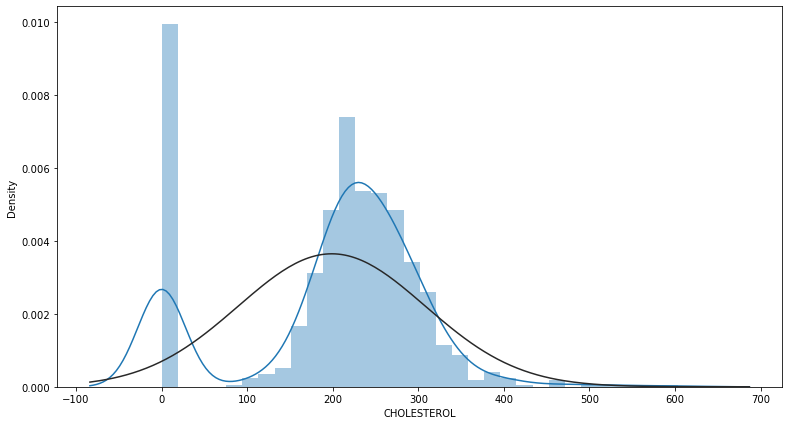

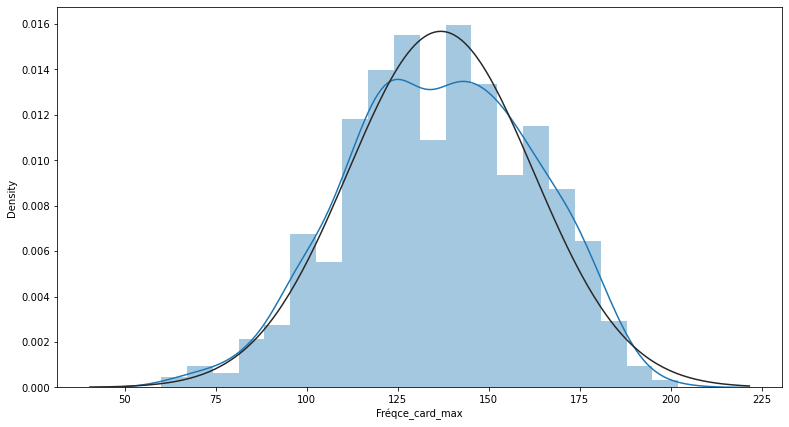

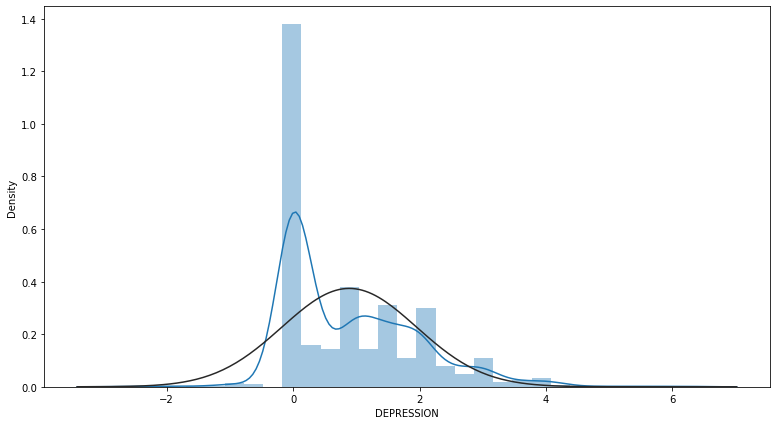

In [17]:
# Visualistaion des variables quantitatives

for col in var_quant:
    plt.figure(figsize=(13,7))
    sns.distplot(var_quant[col], fit=norm)

### EXAMEN DES VARIABLES QUANTITATIVES 2 A 2

<AxesSubplot:>

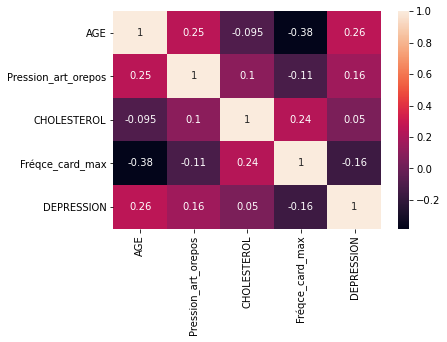

In [18]:
sns.heatmap(var_quant.corr(), annot=True)

* On constate que variables ci-dessus n'entretiennent pas de rapport de corrélation.
   * L'age et la fréquence cardiaque maximale sont corrélés négativement. Cela dit, plus l'age des personnes est avancées, plus leur Fréquence cardiaque est faible.
   *La fréquence cardiaque et la Dépression entretiennent un rapport de corrélation négative. En clair,  Lorsque la fréquence cardiaque est élévée, le risque de faire nune dépression est faible.

### EXAMEN DES VARIABLES QUALITATIVES 2 A 2

### EXAMEN TARGET / VARIABLES QUALIT

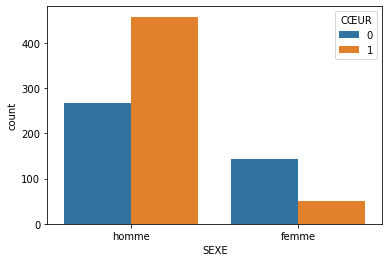

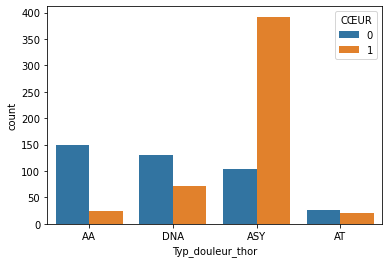

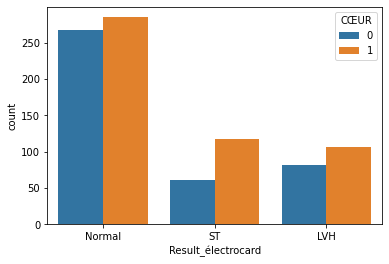

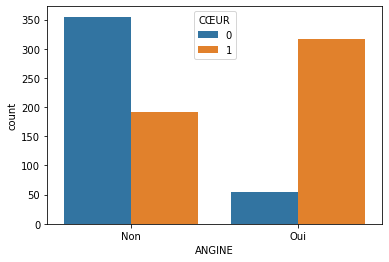

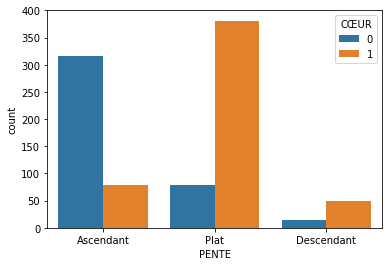

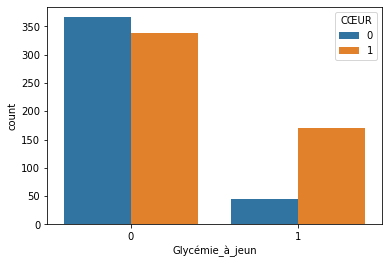

In [26]:
for col in var_quali.columns:
    plt.figure()
    sns.countplot(x = col, hue = 'CŒUR', data = df1)

### EXAMEN TARGET / VARIABLES QUANTIT (AGE)

In [24]:
#catégorisons les ages
df1['AGE'].max(), df1['AGE'].min()
#les ages sont compris entre 28 et 77

(77, 28)

### Classification des variables par catégorie

In [21]:
# Visualisation de la variable cible


<AxesSubplot:xlabel='SEXE', ylabel='count'>

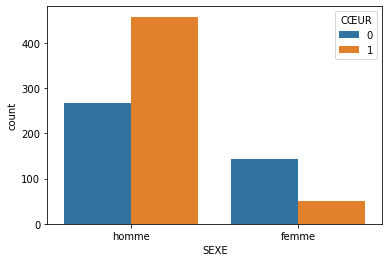

In [22]:
sns.countplot(x = 'SEXE', hue = 'CŒUR', data = df1)

In [23]:
df1.

SyntaxError: invalid syntax (<ipython-input-23-855258c73203>, line 1)

In [ ]:
for col in var_quant.columns:
    plt.figure()
    sns.lmplot(x = 'AGE', y=col, hue = 'CŒUR', data = df1)

In [ ]:
for col in df1.columns:
    sns.countplot(x = 'col', hue = 'CŒUR', data = df1)
    plt.figure(figsize=12, 6)

In [ ]:
df1['Glycémie_à_jeun'].value_counts()

In [ ]:
### Visualisation graphique des variables